# Diffraction by an edge

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from diffractio import degrees, mm, plt, sp, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.utils_drawing import draw_several_fields
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY


In [2]:
# length de area de visualizacion
length = 100 * um
num_data = 512
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)
# longitud de onda
wavelength0 = 0.6238 * um

# fuente de iluminacion
u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength0)
u1.plane_wave(A=1, theta=0 * degrees, phi=0 * degrees)

# mask
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength0)
t1.two_levels(level1=0, level2=1, xcorte=0 * um)
u2 = u1 * t1

u2.draw()

# plano de observacion
z_difraccion = 25 * um

def diffraction_edge(u2, z_mask):
    u3 = u2.RS(z=z_mask, new_field=True)
    texto = "z=%d $\mu m$" % (z_difraccion)
    draw_several_fields(fields=(u2, u3), titulos=('edge', texto))
    plt.tight_layout()

u3.draw_profile(point1=(-15, 0), point2=(15, 0), kind='intensity', order=2)
h, profile, p1, p2 = t1.profile(
    point1=(-15, 0), point2=(15, 0), kind='intensity', order=1)
plt.plot(h, profile, 'r', lw=2)


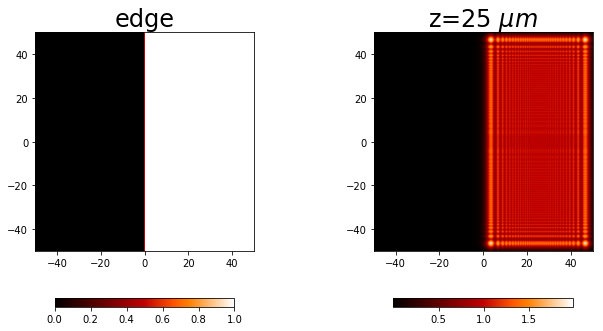

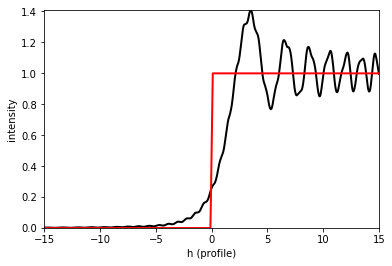

In [3]:
difraccion_edge()